<a href="https://colab.research.google.com/github/ColeBallard/digit-classifier/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

In [14]:
images = np.empty([60494, 35, 35])
labels = np.empty([60494], dtype=int)

directory = 'images'

i = 0
 
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)

    for file in os.listdir(f):
        image = cv2.imread(os.path.join(directory, folder, file))

        grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
        (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

        images[i] = blackAndWhiteImage
        labels[i] = folder

        i += 1

        

In [15]:
data = list(zip(images, labels))
random.shuffle(data)

images, labels = zip(*data)

images = np.asarray(images)
labels = np.asarray(labels)

split_index = int(len(images) * 0.8)
train_images = images[:split_index]
train_labels = labels[:split_index]
test_images = images[split_index:]
test_labels = labels[split_index:]

In [16]:
test_images.shape

(12099, 35, 35)

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

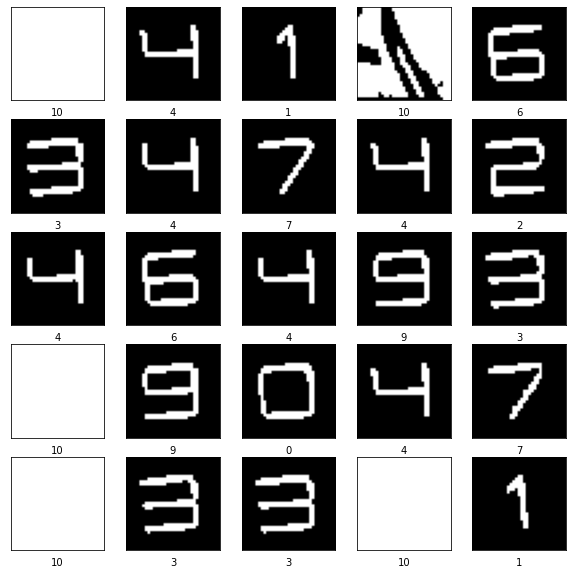

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(35, 35)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1513/1513 [==============================] - 3s 2ms/step - loss: 0.0753 - accuracy: 0.9895
Epoch 2/10
1513/1513 [==============================] - 3s 2ms/step - loss: 0.0043 - accuracy: 0.9992
Epoch 3/10
1513/1513 [==============================] - 3s 2ms/step - loss: 0.0255 - accuracy: 0.9972
Epoch 4/10
1513/1513 [==============================] - 2s 2ms/step - loss: 0.0090 - accuracy: 0.9990
Epoch 5/10
1513/1513 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 0.9992
Epoch 6/10
1513/1513 [==============================] - 2s 2ms/step - loss: 0.0091 - accuracy: 0.9984
Epoch 7/10
1513/1513 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 8/10
1513/1513 [==============================] - 2s 2ms/step - loss: 0.0077 - accuracy: 0.9988
Epoch 9/10
1513/1513 [==============================] - 3s 2ms/step - loss: 0.0118 - accuracy: 0.9990
Epoch 10/10
1513/1513 [==============================] - 3s 2ms/step - loss: 0.005

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

379/379 - 0s - loss: 0.0020 - accuracy: 0.9995 - 383ms/epoch - 1ms/step

Test accuracy: 0.9995040893554688


In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

379/379 [==============================] - 0s 900us/step


In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(11), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

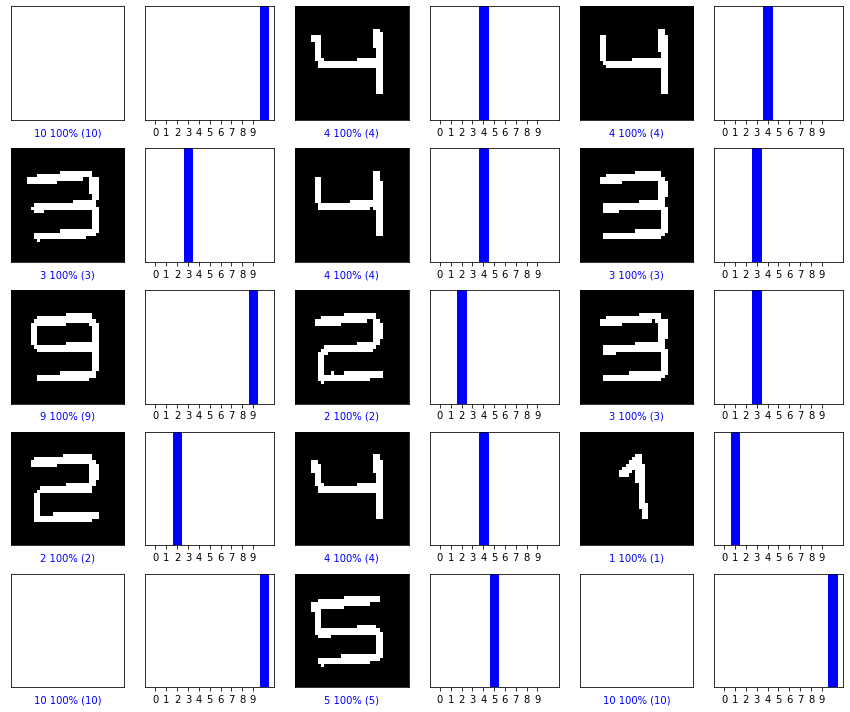

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [34]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets
